COMO SABER SE UMA DETERMINADA AÇÃO SE VALORIZOU EM UM DETERMINADO TEMPO.

In [2]:
import pandas as pd
import pandas_datareader as pdr # 'pdr.data' para acessar o módulo 'data' dentro do pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
# Lista de tickers
tickers = ['PMAM3.SA', 'IRDM11.SA', 'HGLG11.SA', 'VGHF11.SA', 'XPCA11.SA']
# Dicionário para armazenar os dados
dados = {}
# Obtendo os dados de cada ação e armazenando no dicionário
for t in tickers:
    ticker_data = yf.download(t, start='2023-07-01')['Adj Close']
    dados[t] = ticker_data

# Criando um DataFrame com os dados
dados_df = pd.DataFrame(dados)

# Imprimindo o DataFrame
print(dados_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            PMAM3.SA  IRDM11.SA   HGLG11.SA  VGHF11.SA  XPCA11.SA
Date                                                             
2023-07-03      4.67  87.716766  164.500000       9.38       9.42
2023-07-04      4.75  87.885101  165.000000       9.46       9.45
2023-07-05      4.73  87.805885  165.000000       9.47       9.43
2023-07-06      4.66  87.974220  165.410004       9.51       9.40
2023-07-07      4.65  89.023895  166.350006       9.57       9.38
2023-07-10      5.03  88.964478  167.000000       9.57       9.35
2023-07-11      5.13  88.905067  167.839996       9.54       9.33
2023-07-12      5.18  88.110001  166.600006       9.56       

In [4]:
display(dados_df.round(2)) # round(2) pq só quero duas casa depois da virgula


,PMAM3.SA,IRDM11.SA,HGLG11.SA,VGHF11.SA,XPCA11.SA
Date,,,,,
2023-07-03,4.67,87.72,164.50,9.38,9.42
2023-07-04,4.75,87.89,165.00,9.46,9.45
2023-07-05,4.73,87.81,165.00,9.47,9.43
2023-07-06,4.66,87.97,165.41,9.51,9.40
2023-07-07,4.65,89.02,166.35,9.57,9.38
2023-07-10,5.03,88.96,167.00,9.57,9.35
2023-07-11,5.13,88.91,167.84,9.54,9.33
2023-07-12,5.18,88.11,166.60,9.56,9.31
2023-07-13,5.75,87.40,167.14,9.56,9.34


In [5]:
dados_df.isnull().sum() #procurando dados faltantes

PMAM3.SA     0
IRDM11.SA    0
HGLG11.SA    0
VGHF11.SA    0
XPCA11.SA    0
dtype: int64

NORMALIZAR

In [6]:
dados_df.iloc[0]

PMAM3.SA       4.670000
IRDM11.SA     87.716766
HGLG11.SA    164.500000
VGHF11.SA      9.380000
XPCA11.SA      9.420000
Name: 2023-07-03 00:00:00, dtype: float64

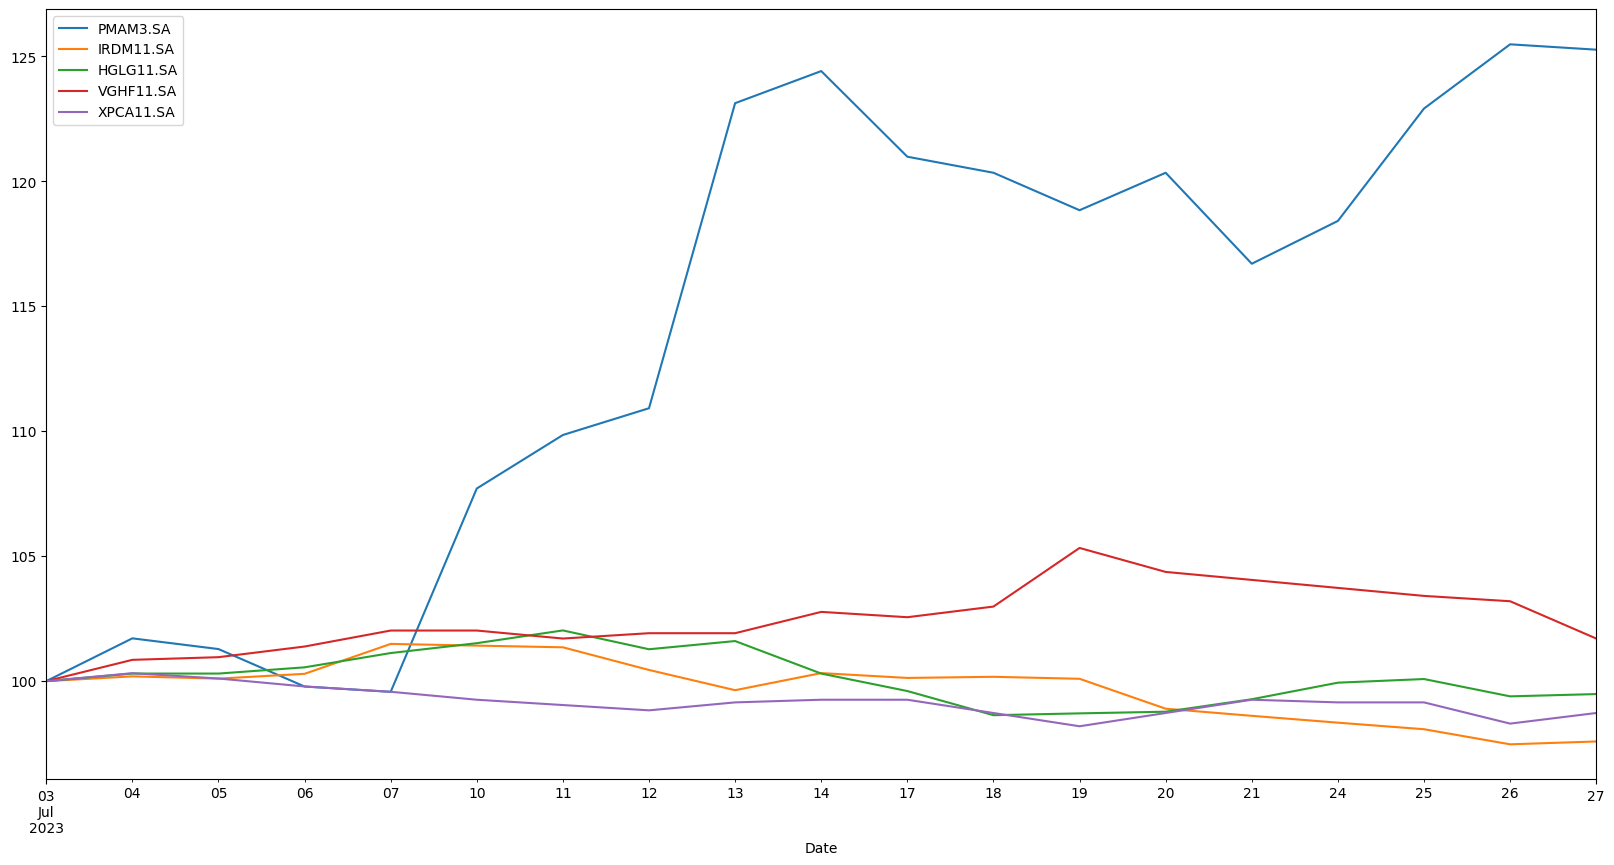

In [7]:
(dados_df/dados_df.iloc[0]*100).plot(figsize=(20,10))
plt.show()

AÇÕES DA PARANAPANEMA TEVE UMA BELA ALTA NESTE MÊS 07 DE 2023

CALCULO DE RETORNO DA CARTEIRA

In [34]:
# Calculando o retorno diário dos dados financeiros
retorno = (dados_df / dados_df.shift(1)) - 1

# Exibindo o DataFrame com os retornos diários
display(retorno)

# Definindo os pesos como um array NumPy
pesos = np.array([0.150])

# Calculando o retorno anual médio dos ativos
retorno_a = retorno.mean() * 250

# Convertendo o retorno_a para um array NumPy e usando reshape
retorno_a_array = retorno_a.to_numpy().reshape(1, -1)

# Calculando o retorno anual ponderado usando o produto interno (dot product)
resultado = np.dot(pesos, retorno_a_array)

# Exibindo o resultado como uma porcentagem
retorno_ponderado_porcentagem = round(resultado[0] * 100, 2)

print("Retorno Anual Ponderado da carteira:", f"{retorno_ponderado_porcentagem}%")


,PMAM3.SA,IRDM11.SA,HGLG11.SA,VGHF11.SA,XPCA11.SA
Date,,,,,
2023-07-03,NaN,NaN,NaN,NaN,NaN
2023-07-04,0.017131,0.001919,0.003040,0.008529,0.003185
2023-07-05,-0.004211,-0.000901,0.000000,0.001057,-0.002116
2023-07-06,-0.014799,0.001917,0.002485,0.004224,-0.003181
2023-07-07,-0.002146,0.011932,0.005683,0.006309,-0.002128
2023-07-10,0.081720,-0.000667,0.003907,0.000000,-0.003198
2023-07-11,0.019881,-0.000668,0.005030,-0.003135,-0.002139
2023-07-12,0.009747,-0.008943,-0.007388,0.002096,-0.002144
2023-07-13,0.110039,-0.008058,0.003241,0.000000,0.003222


Retorno Anual Ponderado: 49.31%
